In [1]:
import pandas as pd
data = pd.read_csv('D:\Tugas Akhir\Codingan\Development\App\notebook\preprocessed_data_train_1.csv')
data.head()

c:\Users\Jesselyn Mu\anaconda3\envs\myenv\lib\site-packages\numpy\__init__.py:148: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.10 from "c:\Users\Jesselyn Mu\anaconda3\envs\myenv\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: No module named 'numpy.core._multiarray_umath'


In [2]:
data['departemen'].unique()

array(['Engineering & IT', 'Service & Support', 'Creative & Design',
       'Marketing', 'Operations', 'HR', 'Finance & Accounting',
       'Corporate Strategy & Communications'], dtype=object)

In [7]:
filter = data[data['employee_id'] == 'EM11453']
filter

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,avg_time_work,departemen,position,income,total_komp,job_satisfaction,performance_rating,churn_status
11446,EM11453,Kota Jakarta Timur,Laki-laki,1993-05-08,2023-05-15,2024-10-01,Single,0,D1,5.0,9.81,HR,Staff,3477585,NaN,3,2,1


In [1]:
import pandas as pd

df = pd.read_csv('D:\Tugas Akhir\Codingan\Development\Data\preprocessed_data_train.csv')
df.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM0001,Kabupaten Bogor,Laki-laki,1970-09-10,2024-01-04,2024-10-31,Married,2,S1,1.0,...,Short-term,5.00,3,2,2599023.0,5,1.039609e+06,2.0,Medium,9.329634
1,EM0002,Kota Jakarta Selatan,Laki-laki,1980-12-09,2021-01-05,2023-04-22,Married,3,SLTA,11.0,...,Mid-term,2.25,4,1,1281761.0,1,1.281761e+06,1.4,Medium,9.815385
2,EM0003,Tangerang,Laki-laki,1987-04-25,2022-01-17,2024-01-31,Single,0,D2,3.0,...,Mid-term,6.00,1,1,4902208.0,3,1.634069e+06,1.8,Medium,9.646590
3,EM0004,Kepulauan Seribu,Laki-laki,1975-12-24,2022-01-26,2024-10-31,Married,1,S1,1.0,...,Mid-term,16.50,2,2,3205246.0,5,1.282098e+06,1.6,Medium,9.536789
4,EM0005,Kota Jakarta Utara,Laki-laki,1987-06-15,2022-01-31,2023-02-21,Single,0,SLTA,1.0,...,Mid-term,6.00,1,1,1208627.0,1,1.208627e+06,2.0,Medium,9.131545


In [2]:
churn = df['churn_status']
exploded_churn = churn.explode()

churn_count = exploded_churn.value_counts().reset_index()
churn_count.columns = ['churn_status', 'Count']
churn_count

,churn_status,Count
0,0,11494
1,1,4044


In [3]:
data = pd.DataFrame()
for index, row in churn_count.iterrows():
    churn = row['churn_status']  
    count = row['Count']
    if count > 4048:
        filtered_data = df[df['churn_status'] == churn].sample(4048)
        data = pd.concat([data, filtered_data])

for index, row in churn_count.iterrows():
    churn = row['churn_status']  
    count = row['Count']
    if count <= 4048:
        filtered_data = df[df['churn_status'] == churn]
        data = pd.concat([data, filtered_data])

data.head()

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
13678,EM13783,Kota Jakarta Timur,Laki-laki,1976-04-03,2020-05-03,2024-10-31,Married,3,S1,0.0,...,Long-term,54.000000,4,2,2804022.0,5,1.121609e+06,2.2,Low,9.840000
13772,EM13877,Kota Depok,Laki-laki,1993-11-29,2021-12-06,2024-10-31,Single,0,S1,3.0,...,Mid-term,8.750000,1,2,2926778.5,5,1.170711e+06,1.0,Medium,9.401041
11756,EM11848,Kabupaten Bogor,Laki-laki,1972-04-17,2020-09-30,2024-10-31,Married,4,D2,3.0,...,Long-term,12.250000,5,1,3547243.0,3,1.182414e+06,3.0,Low,9.523518
13464,EM13569,Kota Jakarta Pusat,Laki-laki,2000-05-13,2023-05-30,2024-10-31,Single,0,S1,4.0,...,Mid-term,3.400000,1,2,3454996.5,5,1.381999e+06,1.8,Medium,9.295650
6463,EM6515,Kabupaten Bekasi,Laki-laki,1972-04-05,2024-02-01,2024-05-09,Married,3,SLTA,10.0,...,Short-term,0.272727,4,1,2525476.0,1,2.525476e+06,1.6,Medium,9.265018


In [4]:
from sklearn.model_selection import train_test_split

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

X = data.drop(columns=['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'])
y = data['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
X.head()

,domisili,jenis_kelamin,marriage_stat,dependant,education,absent_90D,avg_time_work,departemen,position,income,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
13678,Kota Jakarta Timur,Laki-laki,Married,3,S1,0.0,9.84,HR,Junior,5608044,...,Long-term,54.000000,4,2,2804022.0,5,1.121609e+06,2.2,Low,9.840000
13772,Kota Depok,Laki-laki,Single,0,S1,3.0,9.41,Corporate Strategy & Communications,Junior,5853557,...,Mid-term,8.750000,1,2,2926778.5,5,1.170711e+06,1.0,Medium,9.401041
11756,Kabupaten Bogor,Laki-laki,Married,4,D2,3.0,9.53,Corporate Strategy & Communications,Staff,3547243,...,Long-term,12.250000,5,1,3547243.0,3,1.182414e+06,3.0,Low,9.523518
13464,Kota Jakarta Pusat,Laki-laki,Single,0,S1,4.0,9.32,Operations,Junior,6909993,...,Mid-term,3.400000,1,2,3454996.5,5,1.381999e+06,1.8,Medium,9.295650
6463,Kabupaten Bekasi,Laki-laki,Married,3,SLTA,10.0,9.62,Engineering & IT,Staff,2525476,...,Short-term,0.272727,4,1,2525476.0,1,2.525476e+06,1.6,Medium,9.265018


In [6]:
X.to_csv(r"D:\Tugas Akhir\Codingan\Development\App\X_train.csv", index=False)

In [7]:
from catboost import CatBoostClassifier
import pandas as pd

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    cat_features= cat_feature,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    verbose=200
)

# Melatih model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.9691762	best: 0.9691762 (0)	total: 197ms	remaining: 3m 16s
200:	test: 0.9851730	best: 0.9851730 (200)	total: 6.91s	remaining: 27.5s
400:	test: 0.9857376	best: 0.9857407 (389)	total: 14s	remaining: 20.9s
600:	test: 0.9861924	best: 0.9861954 (599)	total: 22.1s	remaining: 14.7s
800:	test: 0.9865571	best: 0.9865571 (800)	total: 30.2s	remaining: 7.5s
999:	test: 0.9867128	best: 0.9867189 (984)	total: 38.4s	remaining: 0us

bestTest = 0.9867188573
bestIteration = 984

Shrink model to first 985 iterations.


In [8]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Fungsi objective untuk Optuna
def objective(trial):
    # Definisikan parameter yang akan dioptimasi
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 0.8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 5, 20),
        'random_strength': trial.suggest_float('random_strength', 5, 10),
        'cat_features': cat_feature,
        'loss_function': 'Logloss',
        'random_state': 42,
        'verbose': 0
    }

    # Inisialisasi model dengan parameter yang dioptimasi
    model = CatBoostClassifier(**params)

    # Melatih model dengan validasi
    model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

    # Prediksi probabilitas untuk menghitung AUC
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    return auc  # Mengembalikan AUC sebagai skor yang ingin dimaksimalkan

In [9]:
# Buat studi Optuna untuk memaksimalkan AUC
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Lakukan 20 percobaan

# Tampilkan hasil terbaik
print("Best Trial:")
print(f"AUC: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-01-19 21:36:46,269] A new study created in memory with name: no-name-24998c48-7ab3-460c-a73b-9aa6f43bfdc8
[I 2025-01-19 21:37:01,527] Trial 0 finished with value: 0.9771551526804926 and parameters: {'iterations': 649, 'learning_rate': 0.002356531904328771, 'depth': 4, 'subsample': 0.5287211911341743, 'colsample_bylevel': 0.5247194897918462, 'l2_leaf_reg': 10.976330879790167, 'random_strength': 7.413435700780713}. Best is trial 0 with value: 0.9771551526804926.
[I 2025-01-19 21:37:17,438] Trial 1 finished with value: 0.9826473774969859 and parameters: {'iterations': 555, 'learning_rate': 0.020382394285856864, 'depth': 5, 'subsample': 0.5386628374413537, 'colsample_bylevel': 0.7011677630678268, 'l2_leaf_reg': 5.113099196547044, 'random_strength': 9.893079897354522}. Best is trial 1 with value: 0.9826473774969859.
[I 2025-01-19 21:37:43,352] Trial 2 finished with value: 0.9776419600482229 and parameters: {'iterations': 707, 'learning_rate': 0.0011523374691728523, 'depth': 6, 'subs

Best Trial:
AUC: 0.9873658990675883
Params:
  iterations: 876
  learning_rate: 0.09562605966721016
  depth: 5
  subsample: 0.7409456779566318
  colsample_bylevel: 0.5586195847075694
  l2_leaf_reg: 8.961877370933633
  random_strength: 5.0170217614609705


In [10]:
# Ambil parameter terbaik dari Optuna
best_params = study.best_trial.params

# Tambahkan parameter tetap (yang tidak dioptimasi)
best_params.update({
    'loss_function': 'Logloss',  # Gunakan Logloss sebagai loss function
    'cat_features': cat_feature,
    'random_state': 42,
    'verbose': 200,  # Aktifkan output verbose
    'od_type': 'Iter',
    'od_wait': 50
})

# Latih model dengan parameter terbaik
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Evaluasi model final
y_pred = final_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, y_pred)
print(f"Final AUC: {final_auc}")

0:	learn: 0.5496446	test: 0.5501316	best: 0.5501316 (0)	total: 24.4ms	remaining: 21.3s
200:	learn: 0.1013691	test: 0.1337989	best: 0.1337962 (199)	total: 5.2s	remaining: 17.4s
400:	learn: 0.0785841	test: 0.1305082	best: 0.1304245 (367)	total: 11s	remaining: 13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1302927779
bestIteration = 406

Shrink model to first 407 iterations.
Final AUC: 0.9874498313723695


In [11]:
import pickle

with open('clasification_model.sav', 'wb') as f:
    pickle.dump(final_model, f)
print("CatBoost Classification model saved to 'clasification_model.sav'")

CatBoost Classification model saved to 'clasification_model.sav'


In [12]:
evals_result = final_model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

Final Training Logloss: 0.07160162089283625
Final Validation Logloss: 0.13042008928172583


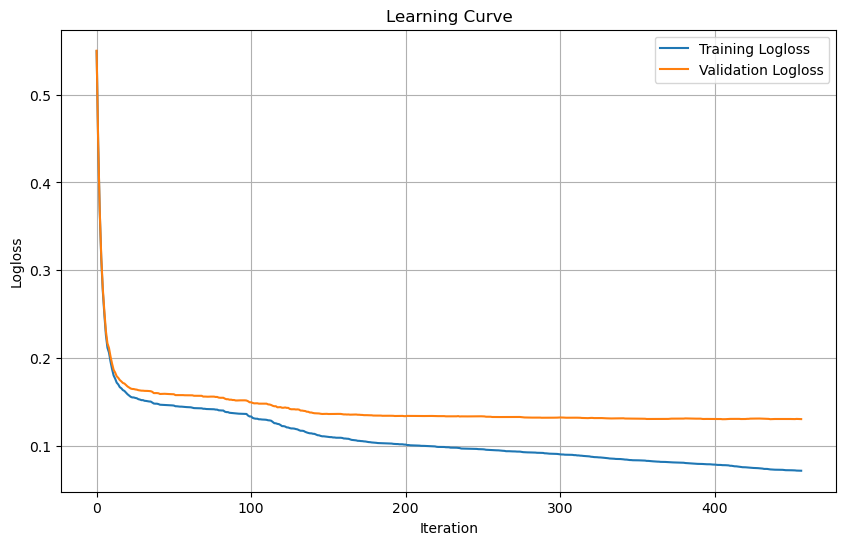

In [13]:
import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

0:	total: 20.5ms	remaining: 20.5s
200:	total: 6.73s	remaining: 26.8s
400:	total: 15s	remaining: 22.4s
600:	total: 23.9s	remaining: 15.9s
800:	total: 33.2s	remaining: 8.24s
999:	total: 43.5s	remaining: 0us
0:	total: 26.3ms	remaining: 26.2s
200:	total: 10.4s	remaining: 41.3s
400:	total: 20.6s	remaining: 30.7s
600:	total: 30.3s	remaining: 20.1s
800:	total: 39.7s	remaining: 9.85s
999:	total: 48.5s	remaining: 0us
0:	total: 35.6ms	remaining: 35.5s
200:	total: 9.03s	remaining: 35.9s
400:	total: 18.7s	remaining: 27.9s
600:	total: 28.4s	remaining: 18.8s
800:	total: 38.1s	remaining: 9.47s
999:	total: 46.5s	remaining: 0us
0:	total: 39.9ms	remaining: 39.9s
200:	total: 8.15s	remaining: 32.4s
400:	total: 16.2s	remaining: 24.2s
600:	total: 24.3s	remaining: 16.1s
800:	total: 33s	remaining: 8.19s
999:	total: 41.7s	remaining: 0us
0:	total: 40.1ms	remaining: 40.1s
200:	total: 8.38s	remaining: 33.3s
400:	total: 16.9s	remaining: 25.3s
600:	total: 25.4s	remaining: 16.8s
800:	total: 33.5s	remaining: 8.33s
99

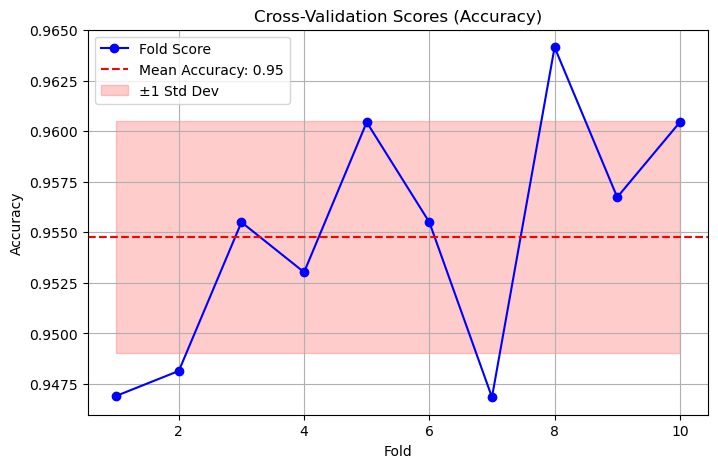

Accuracy Scores for each fold: [0.94691358 0.94814815 0.95550062 0.95302843 0.96044499 0.95550062
 0.94684796 0.96415328 0.95673671 0.96044499]
Mean Accuracy: 0.95
Standard Deviation: 0.01


In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung skor cross-validation dan visualisasi
def cross_validate_and_visualize_accuracy(model, X, y, cv=10):
    # Stratified K-Fold untuk mempertahankan distribusi label
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Hitung skor cross-validation dengan metrik akurasi
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf)

    # Rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Visualisasi hasil cross-validation
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, cv + 1), scores, marker='o', linestyle='-', color='b', label='Fold Score')
    plt.axhline(y=mean_score, color='r', linestyle='--', label=f'Mean Accuracy: {mean_score:.2f}')
    plt.fill_between(range(1, cv + 1), mean_score - std_score, mean_score + std_score, color='r', alpha=0.2, label='±1 Std Dev')
    plt.title('Cross-Validation Scores (Accuracy)')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Cetak hasil skor
    print(f'Accuracy Scores for each fold: {scores}')
    print(f'Mean Accuracy: {mean_score:.2f}')
    print(f'Standard Deviation: {std_score:.2f}')

# Contoh penggunaan
# Ganti model dengan model Anda, misalnya `model`
cross_validate_and_visualize_accuracy(model, X, y, cv=10)

0:	learn: 0.5471794	total: 32.4ms	remaining: 28.4s
200:	learn: 0.1015757	total: 6.25s	remaining: 21s
400:	learn: 0.0766872	total: 13s	remaining: 15.4s
600:	learn: 0.0614839	total: 20.1s	remaining: 9.21s
800:	learn: 0.0512545	total: 26.8s	remaining: 2.51s
875:	learn: 0.0477551	total: 29.4s	remaining: 0us
0:	learn: 0.5481219	total: 35.6ms	remaining: 31.1s
200:	learn: 0.0981562	total: 6.35s	remaining: 21.3s
400:	learn: 0.0772036	total: 13.3s	remaining: 15.8s
600:	learn: 0.0599954	total: 19.8s	remaining: 9.08s
800:	learn: 0.0473294	total: 26.3s	remaining: 2.47s
875:	learn: 0.0440178	total: 28.9s	remaining: 0us
0:	learn: 0.5523868	total: 37.9ms	remaining: 33.1s
200:	learn: 0.1038157	total: 6.43s	remaining: 21.6s
400:	learn: 0.0795523	total: 13.3s	remaining: 15.7s
600:	learn: 0.0626088	total: 20.1s	remaining: 9.19s
800:	learn: 0.0498160	total: 27s	remaining: 2.53s
875:	learn: 0.0456413	total: 29.4s	remaining: 0us
0:	learn: 0.5464817	total: 27.7ms	remaining: 24.3s
200:	learn: 0.1034084	total:

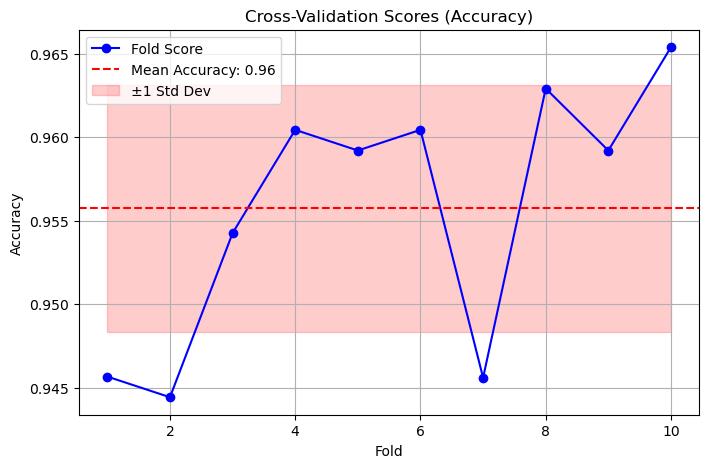

Accuracy Scores for each fold: [0.94567901 0.94444444 0.95426452 0.96044499 0.9592089  0.96044499
 0.94561187 0.96291718 0.9592089  0.96538937]
Mean Accuracy: 0.96
Standard Deviation: 0.01


In [15]:
cross_validate_and_visualize_accuracy(final_model, X, y, cv=10)

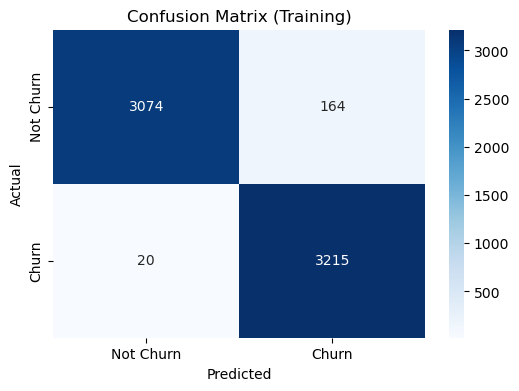

Training Metrics:
Accuracy: 0.97
Precision: 0.95
Recall: 0.99
F1 Score: 0.97
------------------------------


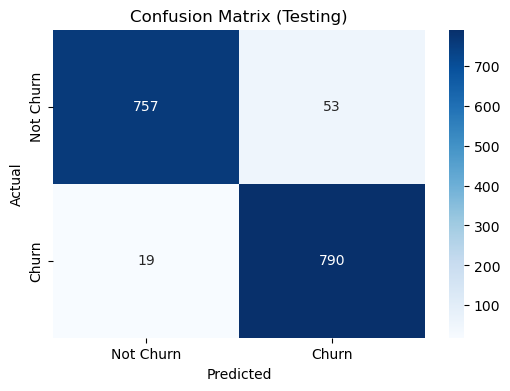

Testing Metrics:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1 Score: 0.96
------------------------------


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan confusion matrix dan metrik evaluasi
def evaluate_model(y_true, y_pred, dataset_name):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()
    
    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print(f'{dataset_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('-' * 30)

# Prediksi untuk data training dan testing
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

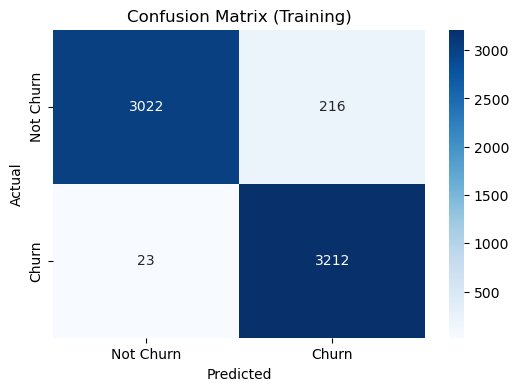

Training Metrics:
Accuracy: 0.96
Precision: 0.94
Recall: 0.99
F1 Score: 0.96
------------------------------


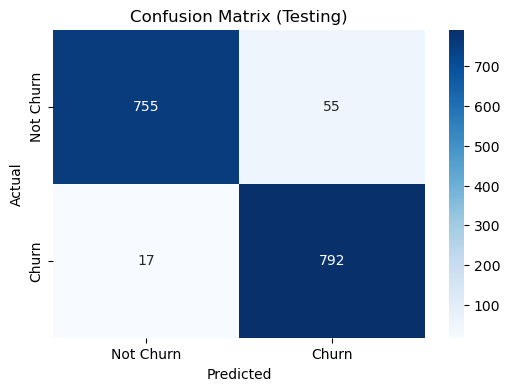

Testing Metrics:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1 Score: 0.96
------------------------------


In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

Final Training Logloss: 0.09655999575829563
Final Validation Logloss: 0.13220269163650872


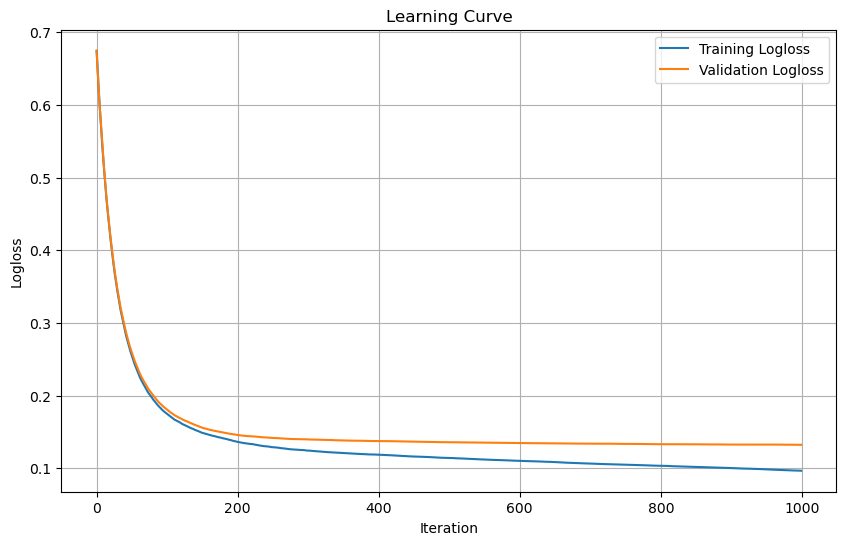

In [18]:
evals_result = model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [2]:
df_test = pd.read_csv('D:\Tugas Akhir\Codingan\Development\Data\data_testing.csv')
df_test

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM9660,Kota Jakarta Timur,Perempuan,1970-07-27,2023-10-09,2024-10-31,Single,0,D3,2.0,...,Mid-term,4.000000,1,1,4843236.0,4,1210809.00,2.0,Medium,9.182979
1,EM12614,Tangerang,Laki-laki,1972-03-13,2023-12-19,2024-10-31,Married,1,D1,1.0,...,Short-term,5.000000,2,1,3491432.0,2,1745716.00,2.6,Medium,9.529412
2,EM2150,Kota Jakarta Timur,Laki-laki,1986-12-27,2022-05-22,2023-07-05,Married,1,SLTA,4.0,...,Mid-term,2.600000,2,1,1727468.0,1,1727468.00,3.0,Medium,9.288164
3,EM6733,Kabupaten Bogor,Laki-laki,1978-07-12,2022-12-07,2024-10-31,Married,4,D3,6.0,...,Mid-term,3.285714,5,1,3745375.0,4,936343.75,1.6,Medium,9.053694
4,EM9133,Kabupaten Bekasi,Perempuan,1994-06-03,2023-05-29,2023-10-20,Married,0,SLTA,0.0,...,Short-term,4.000000,1,1,2658503.0,1,2658503.00,1.0,Medium,9.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,EM7715,Kabupaten Bekasi,Perempuan,1985-04-11,2021-02-07,2023-02-25,Married,2,SLTA,7.0,...,Mid-term,3.000000,3,1,1197442.0,1,1197442.00,2.2,Medium,9.728385
3104,EM2762,Kabupaten Bogor,Perempuan,1984-05-22,2021-11-11,2024-10-31,Married,2,SLTA,6.0,...,Mid-term,5.142857,3,1,2192338.0,1,2192338.00,2.2,Medium,9.622154
3105,EM1927,Kota Jakarta Barat,Perempuan,1968-12-11,2020-06-21,2024-10-31,Married,2,S1,0.0,...,Long-term,53.000000,3,2,3001594.5,5,1200637.80,1.0,Low,9.710000
3106,EM7271,Kota Jakarta Barat,Perempuan,1977-05-09,2021-05-26,2024-10-31,Married,3,S1,0.0,...,Long-term,41.000000,4,2,3153785.0,5,1261514.00,1.4,Low,9.070000


In [3]:
df_test['churn_status'].value_counts()

0    2299
1     809
Name: churn_status, dtype: int64

In [20]:
# Konversi kolom join_date ke datetime
df_test['join_date'] = pd.to_datetime(df_test['join_date'])

# Cari tanggal terlama (minimum) dan terbaru (maksimum)
oldest_date = df_test['join_date'].min()
latest_date = df_test['join_date'].max()

# Cetak hasil
print(f"Tanggal terlama (minimum): {oldest_date}")
print(f"Tanggal terbaru (maksimum): {latest_date}")

Tanggal terlama (minimum): 2020-01-02 00:00:00
Tanggal terbaru (maksimum): 2024-10-30 00:00:00


In [22]:
# end_date = pd.to_datetime("2024-10-31")
# df_test["date_of_birth"] = pd.to_datetime(df_test["date_of_birth"], errors='coerce')
# df_test["age_years"] = (end_date - df_test["date_of_birth"]).dt.days // 365

# df_test["join_date"] = pd.to_datetime(df_test["join_date"])
# df_test["resign_date"] = pd.to_datetime(df_test["resign_date"])

# df_test["resign_date"].fillna(end_date, inplace=True)

# df_test["total_komp"].fillna(0, inplace=True)
# df_test["absent_90D"].fillna(0, inplace=True)

# df_test["active_work"] = (df_test["resign_date"] - df_test["join_date"]).dt.days

# df_test["active_work_months"] = df_test["active_work"] // 30
# df_test["income_3_months"] = df_test["income"] * 3
# df_test["income_6_months"] = df_test["income"] * 6
# df_test["total_income_work"] = df_test["income"] * df_test["active_work_months"]

# df_test["absence_ratio"] = df_test["absent_90D"] / (df_test["active_work"] / 90)
# df_test["income_dependant_ratio"] = df_test["income"] / (df_test["dependant"] + 1)
# df_test["work_efficiency"] = df_test["avg_time_work"] / 8

# def categorize_work_duration_months(months):
#     if months < 12:
#         return "Short-term"
#     elif 12 <= months <= 36:
#         return "Mid-term"
#     else:
#         return "Long-term"

# df_test['active_work_category'] = df_test['active_work_months'].apply(categorize_work_duration_months)

# # Work Stability Score
# df_test['work_stability_score'] = df_test['active_work_months'] / (df_test['absent_90D'] + 1)

# # Married-Dependent Ratio
# def married_dependent_ratio(row):
#     if row['marriage_stat'] == 'Married':
#         return row['dependant'] + 1
#     else:
#         return 1

# df_test['married_dependent_ratio'] = df_test.apply(married_dependent_ratio, axis=1)

# # Job Income to Position Score
# position_score_mapping = {'Junior': 2, 'Staff': 1, 'Senior': 3, 'Manager': 4}
# df_test['position_score'] = df_test['position'].map(position_score_mapping)
# df_test['job_income_position_score'] = df_test['income'] / df_test['position_score']

# # Education-Adjusted Income
# education_score_mapping = {'SLTA': 1, 'D1': 2, 'D2': 3, 'D3': 4, 'S1': 5, 'S2': 6, 'S3': 7}
# df_test['education_score'] = df_test['education'].map(education_score_mapping)
# df_test['education_income_ratio'] = df_test['income'] / df_test['education_score']

# # Weighted Satisfaction-Performance Score
# df_test['weighted_satisfaction_performance'] = (
#     0.6 * df_test['job_satisfaction'] + 0.4 * df_test['performance_rating']
# )

# # Resign Risk Indicator
# def resign_risk_indicator(row):
#     if row['age_years'] < 30 and row['active_work_months'] < 12:
#         return "High"
#     elif 1 <= row['active_work_months'] <= 36:
#         return "Medium"
#     else:
#         return "Low"

# df_test['resign_risk_indicator'] = df_test.apply(resign_risk_indicator, axis=1)

# # Adjusted Work Time
# df_test['adjusted_work_time'] = df_test['avg_time_work'] * (1 - (df_test['absent_90D'] / ((df_test['active_work_months'] * 90) + 1)))

# job_satisfaction_mapping = {1.0: 'Low', 2.0: 'Medium', 3.0: 'High', 4.0: 'Very High'}
# df_test['job_satisfaction'] = df_test['job_satisfaction'].map(job_satisfaction_mapping)

# performance_rating_mapping = {1.0: 'Low', 2.0: 'Good', 3.0: 'Excellent', 4.0: 'Outstanding'}
# df_test['performance_rating'] = df_test['performance_rating'].map(performance_rating_mapping)

In [21]:
# Memilih hanya kolom numerik
numerical_columns = df_test.select_dtypes(include=['int64', 'float64']).columns

# Filter: Hanya menyimpan baris yang tidak memiliki nilai negatif
df_test_filtered = df_test[(df_test[numerical_columns] >= 0).all(axis=1)]

# Menampilkan hasil
print("Jumlah baris sebelum filter:", df_test.shape[0])
print("Jumlah baris setelah filter:", df_test_filtered.shape[0])

Jumlah baris sebelum filter: 3108
Jumlah baris setelah filter: 3108


In [22]:
df_test = df_test.dropna(subset=['marriage_stat'])

In [23]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9453024453024453
Precision: 0.8310880829015544
Recall: 0.9913473423980222
F1 Score: 0.9041713641488162


In [4]:
df_test = pd.read_csv('D:\Tugas Akhir\Codingan\Development\Data\data_testing_resign.csv')
df_test

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM13260,Kota Jakarta Barat,Perempuan,1976-12-02,2020-10-25,2023-02-16,Married,2,SLTA,8.0,...,Mid-term,3.111111,3,1,2252793.0,1,2.252793e+06,2.0,Medium,9.280456
1,EM0533,Tangerang,Laki-laki,1970-10-08,2022-10-05,2024-03-25,Married,3,SLTA,14.0,...,Mid-term,1.133333,4,1,1784520.0,1,1.784520e+06,1.8,Medium,9.809471
2,EM7296,Kota Depok,Perempuan,1980-05-10,2022-07-21,2023-09-01,Married,2,SLTA,14.0,...,Mid-term,0.866667,3,1,1291410.0,1,1.291410e+06,1.6,Medium,9.534629
3,EM9032,Kota Depok,Perempuan,1993-10-24,2022-07-05,2024-01-25,Married,2,D2,7.0,...,Mid-term,2.250000,3,1,3909283.0,3,1.303094e+06,1.0,Medium,9.468933
4,EM11615,Tangerang,Laki-laki,1987-02-02,2022-09-14,2023-11-03,Divorce,0,SLTA,8.0,...,Mid-term,1.444444,1,1,2615265.0,1,2.615265e+06,2.2,Medium,8.968309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,EM12172,Kota Jakarta Timur,Perempuan,1985-12-27,2022-05-31,2023-07-04,Married,2,SLTA,4.0,...,Mid-term,2.600000,3,1,1666355.0,1,1.666355e+06,2.2,Medium,9.517378
805,EM1528,Kabupaten Bekasi,Perempuan,1982-02-08,2022-02-15,2024-04-06,Married,2,D1,4.0,...,Mid-term,5.200000,3,1,4090506.0,2,2.045253e+06,1.6,Medium,9.214229
806,EM12674,Kabupaten Bogor,Perempuan,1994-10-19,2021-08-02,2023-07-07,Married,0,SLTA,12.0,...,Mid-term,1.769231,1,1,2400606.0,1,2.400606e+06,2.0,Medium,9.693506
807,EM13279,Kabupaten Bogor,Perempuan,1985-07-16,2021-12-12,2024-03-19,Married,2,D2,3.0,...,Mid-term,6.750000,3,1,3852210.0,3,1.284070e+06,2.2,Medium,9.278536


In [25]:
# Memilih hanya kolom numerik
numerical_columns = df_test.select_dtypes(include=['int64', 'float64']).columns

# Filter: Hanya menyimpan baris yang tidak memiliki nilai negatif
df_test_filtered = df_test[(df_test[numerical_columns] >= 0).all(axis=1)]

# Menampilkan hasil
print("Jumlah baris sebelum filter:", df_test.shape[0])
print("Jumlah baris setelah filter:", df_test_filtered.shape[0])

Jumlah baris sebelum filter: 809
Jumlah baris setelah filter: 809


In [26]:
df_test = df_test.dropna(subset=['marriage_stat'])

In [27]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9913473423980222
Precision: 1.0
Recall: 0.9913473423980222
F1 Score: 0.9956548727498449


In [5]:
import pandas as pd

df_test = pd.read_csv('D:\Tugas Akhir\Codingan\Development\Data\data_testing_resign_6.csv')
df_test

,employee_id,domisili,jenis_kelamin,date_of_birth,join_date,resign_date,marriage_stat,dependant,education,absent_90D,...,active_work_category,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,resign_risk_indicator,adjusted_work_time
0,EM0012,Tangerang,Laki-laki,1970-12-21,2023-02-23,2024-08-07,Married,3,D3,2.0,...,Mid-term,5.666667,4,1,4708861.0,4,1.177215e+06,1.4,Medium,9.857106
1,EM0026,Kota Depok,Laki-laki,1986-11-14,2022-04-17,2024-08-04,Married,2,SLTA,4.0,...,Mid-term,5.600000,3,1,1430853.0,1,1.430853e+06,1.0,Medium,9.694593
2,EM0041,Kota Jakarta Barat,Laki-laki,1983-03-16,2023-06-15,2024-09-06,Divorce,3,SLTA,7.0,...,Mid-term,1.750000,1,1,1379381.0,1,1.379381e+06,2.4,Medium,9.059429
3,EM0053,Kota Jakarta Timur,Laki-laki,1979-07-13,2023-07-11,2024-09-21,Single,0,SLTA,1.0,...,Mid-term,7.000000,1,1,1911583.0,1,1.911583e+06,1.0,Medium,9.842189
4,EM0057,Kota Jakarta Barat,Perempuan,2000-03-13,2022-07-14,2024-08-29,Single,0,D2,8.0,...,Mid-term,2.777778,1,1,3724157.0,3,1.241386e+06,2.0,Medium,9.047730
5,EM0058,Tangerang,Perempuan,1996-04-23,2023-07-18,2024-09-26,Single,0,SLTA,9.0,...,Mid-term,1.400000,1,1,2229928.0,1,2.229928e+06,1.4,Medium,9.114481
6,EM0064,Kota Jakarta Utara,Perempuan,1987-04-20,2022-07-25,2024-08-23,Married,3,SLTA,0.0,...,Mid-term,25.000000,4,1,1257855.0,1,1.257855e+06,2.2,Medium,9.320000
7,EM0180,Kota Jakarta Utara,Perempuan,2000-06-25,2022-09-04,2024-10-07,Single,0,D2,7.0,...,Mid-term,3.125000,1,1,3034058.0,3,1.011353e+06,2.2,Medium,9.091639
8,EM0259,Kepulauan Seribu,Laki-laki,1993-10-04,2023-06-08,2024-08-29,Single,0,D1,4.0,...,Mid-term,2.800000,1,1,4513378.0,2,2.256689e+06,2.6,Medium,9.479833
9,EM0263,Kabupaten Bogor,Laki-laki,1995-02-15,2022-06-15,2024-07-27,Married,1,SLTA,13.0,...,Mid-term,1.785714,2,1,1599099.0,1,1.599099e+06,1.6,Medium,9.077272


In [31]:
df_test.isna().sum()

employee_id                          0
domisili                             0
jenis_kelamin                        0
date_of_birth                        0
join_date                            0
resign_date                          0
marriage_stat                        0
dependant                            0
education                            0
absent_90D                           0
avg_time_work                        0
departemen                           0
position                             0
income                               0
total_komp                           0
job_satisfaction                     0
performance_rating                   0
churn_status                         0
age_years                            0
active_work                          0
active_work_months                   0
income_3_months                      0
income_6_months                      0
total_income_work                    0
absence_ratio                        0
income_dependant_ratio   

In [5]:
import pickle

final_model = pickle.load(open('clasification_model.sav', 'rb'))

In [12]:
expected_columns = final_model.feature_names_
print(expected_columns)

['departemen', 'position', 'income', 'domisili', 'marriage_stat', 'dependant', 'education', 'absent_90D', 'avg_time_work', 'total_komp', 'job_satisfaction', 'performance_rating', 'age_years', 'active_work', 'active_work_months', 'income_3_months', 'income_6_months', 'total_income_work', 'absence_ratio', 'income_dependant_ratio', 'work_efficiency', 'active_work_category', 'work_stability_score', 'married_dependent_ratio', 'position_score', 'job_income_position_score', 'education_score', 'education_income_ratio', 'weighted_satisfaction_performance', 'resign_risk_indicator', 'adjusted_work_time']


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import Pool

# Drop kolom yang tidak relevan
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

# Konversi semua kolom kategori ke string
cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 
               'performance_rating', 'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

# Pastikan semua fitur kategori adalah string
for col in cat_feature:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(str)

# Buat Pool untuk data uji
test_pool = Pool(data=X_test, cat_features=cat_feature)

# Prediksi dengan model menggunakan Pool
y_pred = final_model.predict(test_pool)

# Evaluasi
accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
df_test.describe()

,income,dependant,absent_90D,avg_time_work,total_komp,churn_status,age_years,active_work,active_work_months,income_3_months,...,income_dependant_ratio,work_efficiency,work_stability_score,married_dependent_ratio,position_score,job_income_position_score,education_score,education_income_ratio,weighted_satisfaction_performance,adjusted_work_time
count,8.120000e+02,812.000000,812.000000,812.0,812.000000,812.0,812.000000,812.000000,812.000000,8.120000e+02,...,8.120000e+02,812.000,812.000000,812.000000,812.000000,8.120000e+02,812.000000,8.120000e+02,812.000000,812.000000
mean,2.704077e+06,1.443350,5.703202,9.0,0.116995,1.0,37.488916,601.076355,19.556650,8.112230e+06,...,1.494665e+06,1.125,5.940580,2.387931,1.008621,2.676485e+06,1.838670,1.650454e+06,2.018966,8.967059
std,1.217016e+06,1.272101,4.420202,0.0,0.543866,0.0,8.914092,195.811635,6.545148,3.651049e+06,...,1.103701e+06,0.000,6.556615,1.283876,0.092504,1.165877e+06,1.136691,5.549310e+05,0.580476,0.029627
min,1.015570e+06,0.000000,0.000000,9.0,0.000000,1.0,1.000000,365.000000,12.000000,3.046710e+06,...,1.907077e+05,1.125,0.705882,1.000000,1.000000,1.015570e+06,1.000000,7.524518e+05,1.000000,8.866790
25%,1.570747e+06,0.000000,2.000000,9.0,0.000000,1.0,30.000000,428.000000,14.000000,4.712242e+06,...,6.466449e+05,1.125,1.854396,1.000000,1.000000,1.570747e+06,1.000000,1.200502e+06,1.600000,8.950040
50%,2.561418e+06,1.000000,5.000000,9.0,0.000000,1.0,37.000000,496.500000,16.000000,7.684256e+06,...,1.168337e+06,1.125,3.200000,2.000000,1.000000,2.561418e+06,1.000000,1.548386e+06,2.000000,8.973353
75%,3.692924e+06,2.000000,9.000000,9.0,0.000000,1.0,44.000000,798.000000,26.000000,1.107877e+07,...,1.879129e+06,1.125,7.000000,3.000000,1.000000,3.679853e+06,3.000000,2.048790e+06,2.400000,8.991674
max,7.855813e+06,6.000000,16.000000,9.0,12.000000,1.0,57.000000,1095.000000,36.000000,2.356744e+07,...,7.855813e+06,1.125,33.000000,7.000000,2.000000,4.982560e+06,5.000000,2.996378e+06,3.000000,9.000000


In [ ]:
feature_names = X_train.columns.tolist()
feature_importance = model.get_feature_importance()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
21,active_work_category,54.255294
13,active_work,7.777737
1,position,7.155448
14,active_work_months,4.230350
24,position_score,3.667581
26,education_score,3.106486
16,income_6_months,3.089712
6,education,2.826131
2,income,2.385703
17,total_income_work,2.048091


In [28]:
import pickle

with open('clasification_model.sav', 'wb') as f:
    pickle.dump(final_model, f)
print("CatBoost Classification model saved to 'clasification_model.sav'")

CatBoost Classification model saved to 'clasification_model.sav'


In [2]:
%pip install streamlit-option-menu

  Using cached streamlit_option_menu-0.4.0-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/829.3 kB ? eta -:--:--
   ------------------------- -------------- 524.3/829.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 829.3/829.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.1 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.1 MB 3.5 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/9.1 MB 4.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.1 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/9.1 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.1 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/9.1 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 6.0/9.1 MB 3.7 MB/s eta 0:00:01
   -----------

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\jesselyn mu\\anaconda3\\scripts\\streamlit.exe'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
